In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
nRowsRead = None
df1 = pd.read_csv('./sample.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'sample.csv'
nRow, nCol = df1.shape

print(f'There are {nRow} rows and {nCol} columns')

There are 37069 rows and 9 columns


In [4]:
df1[:]

,No.,Time,Source,Destination,Protocol,Length,Info,SourcePort,DestinationPort
0,1,0.000000,192.168.1.41,172.217.163.202,UDP,75,56104 > 443 Len=33,56104.0,443.0
1,2,0.020739,172.217.163.202,192.168.1.41,UDP,67,443 > 56104 Len=25,443.0,56104.0
2,3,1.626530,192.168.1.41,172.217.163.202,UDP,75,56104 > 443 Len=33,56104.0,443.0
3,4,1.647854,172.217.163.202,192.168.1.41,UDP,67,443 > 56104 Len=25,443.0,56104.0
4,5,2.273481,192.168.1.41,34.213.81.249,TCP,55,64381 > 443 [ACK] Seq=1 Ack=1 Win=513 Len=1 ...,64381.0,443.0
...,...,...,...,...,...,...,...,...,...
37064,37065,316.115663,192.168.1.41,172.217.194.189,QUIC,75,"Protected Payload (KP0), DCID=32fbd04cc3375da9",56883.0,443.0
37065,37066,316.180459,172.217.194.189,192.168.1.41,QUIC,68,Protected Payload (KP0),443.0,56883.0
37066,37067,316.395302,192.168.1.41,172.217.194.189,QUIC,75,"Protected Payload (KP0), DCID=32fbd04cc3375da9",56883.0,443.0
37067,37068,316.457307,172.217.194.189,192.168.1.41,QUIC,68,Protected Payload (KP0),443.0,56883.0


In [5]:
df1.dropna(inplace = True)

In [6]:
df1.drop(columns =["Time"], inplace = True)

In [7]:
df1.columns

Index(['No.', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'SourcePort', 'DestinationPort'],
      dtype='object')

In [8]:
df1.drop(columns =["No."], inplace = True)

In [9]:
df2 = df1

In [10]:
df2.drop(columns =["Source", "SourcePort", "Destination", "DestinationPort"], inplace = True) 

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb_make = LabelEncoder()
df2["No."] = lb_make.fit_transform(df2["Protocol"])
df2[["Protocol", "No."]].head(11)

,Protocol,No.
0,UDP,11
1,UDP,11
2,UDP,11
3,UDP,11
4,TCP,8
5,TCP,8
6,UDP,11
7,UDP,11
8,TLSv1.2,9
9,TCP,8


In [14]:
df2.head()

,Protocol,Length,Info,No.
0,UDP,75,56104 > 443 Len=33,11
1,UDP,67,443 > 56104 Len=25,11
2,UDP,75,56104 > 443 Len=33,11
3,UDP,67,443 > 56104 Len=25,11
4,TCP,55,64381 > 443 [ACK] Seq=1 Ack=1 Win=513 Len=1 ...,8


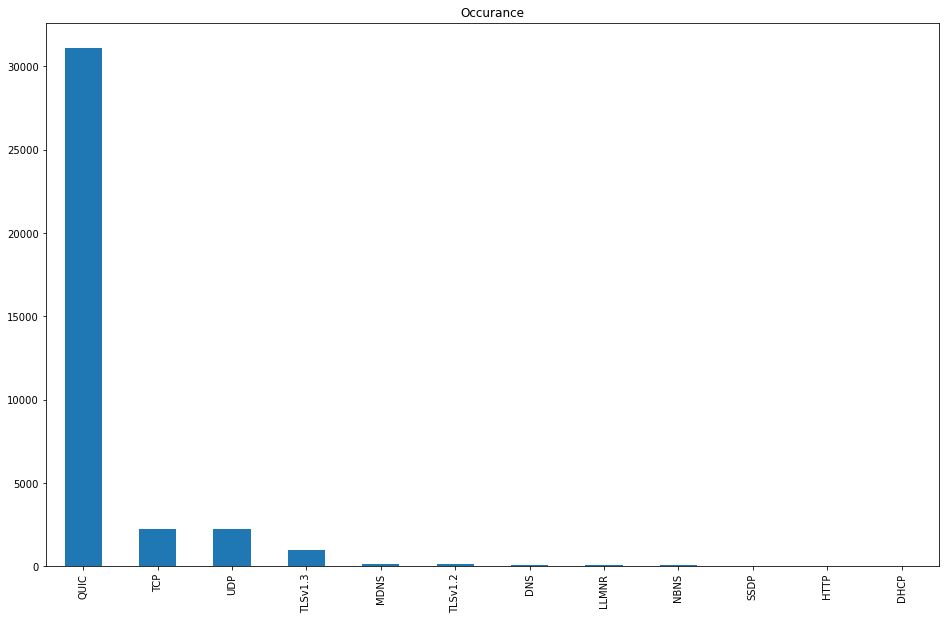

In [15]:
target_count = df2['Protocol'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance');

In [16]:
df2.drop(columns = ["Info"], inplace = True)

In [17]:
df2.drop(columns = ["Protocol"], inplace = True)

In [18]:
from sklearn.model_selection import train_test_split

y = df2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.5)

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100) 
clf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
predictions = clf.predict(X_test)

In [21]:
clf.score(X_test, y_test)

0.9999459839032031

[[   45     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0]
 [    0     0    35     0     0     0     0     0     0     0     0]
 [    0     0     0    72     0     0     0     0     0     0     0]
 [    0     0     0     0    25     0     0     0     0     0     0]
 [    0     0     0     0     0 15609     0     0     0     0     0]
 [    0     0     0     0     0     0    19     0     0     0     0]
 [    0     0     0     0     0     0     0  1117     0     0     0]
 [    0     0     0     0     0     0     0     0    69     0     0]
 [    0     0     0     0     0     0     0     1     0   480     0]
 [    0     0     0     0     0     0     0     0     0     0  1040]]


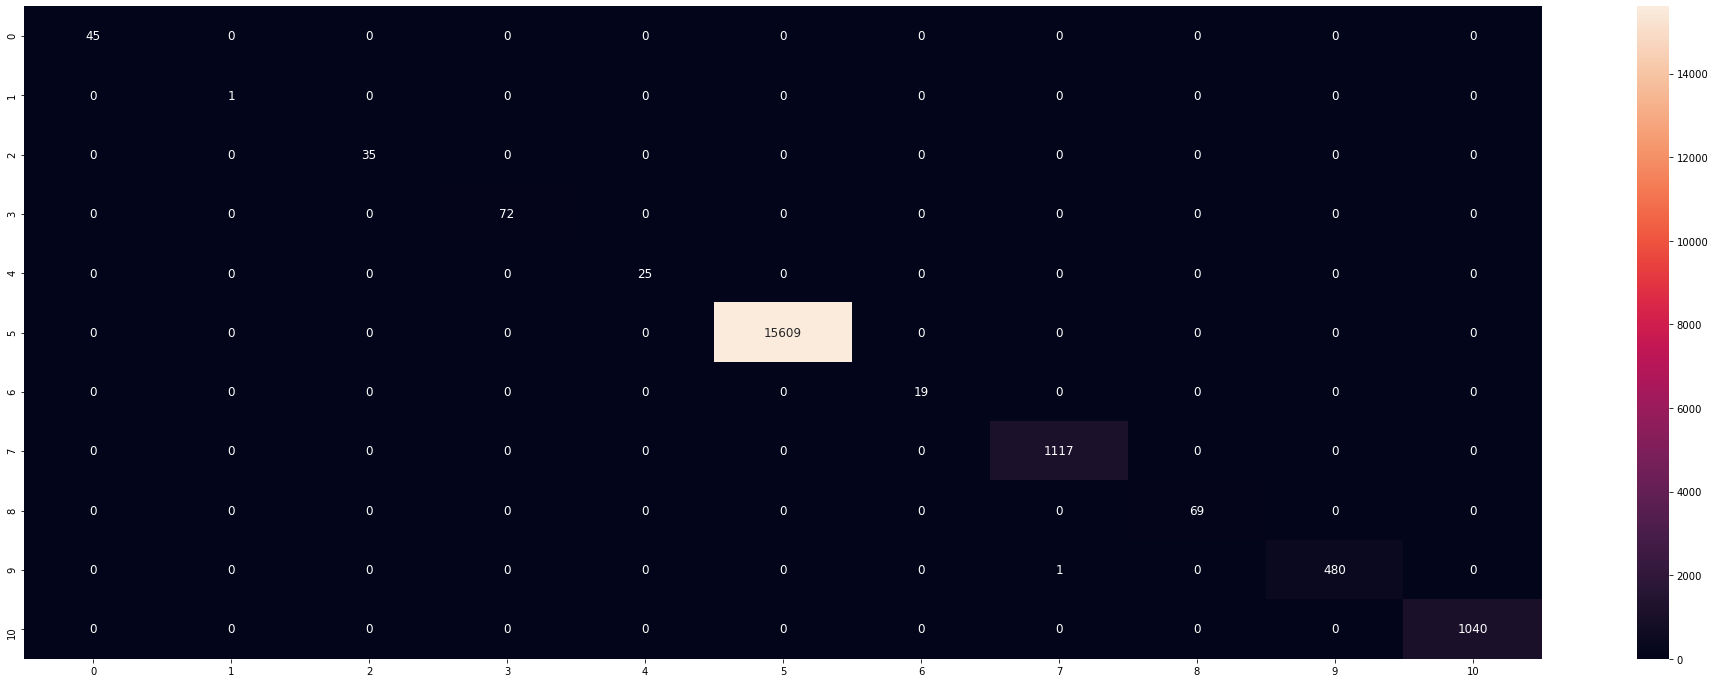

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# Scaling the variables
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(X_train)
x_train = scaler_x.transform(X_test)

# Predicting the test set results
y_prediction = clf.predict(X_test)


# Making the confusion matrix
conMat = confusion_matrix(y_true=y_test, y_pred=y_prediction)
confusionDataFrame = pd.DataFrame(conMat)
confusionDataFrame.to_csv("ConfusionMatrix.csv")

fig, ax = plt.subplots(figsize=(34,12)) 
sns.heatmap(conMat,annot=True, ax=ax, fmt='d', annot_kws={"size": 12})
plt.savefig("ConfusionMatrix.png")

print(conMat)